In [1]:
from convlstm import SeismicConvLSTM
from customLoss import CustomLoss
import torch
from dataloader import train_dataloader, val_dataloader, test_dataloader
from evaluater import evaluate_model


---------------- Dataset information: ----------------
Sample rate: 100 Hz
Chosen window size: 900
Hopping size: 300
Each sample is window_size/sample rate seconds long. Each sample has 3 channels.
Dataset values shape is: [num_samples, num_window, num_channel, (height) 1, (width) num_sample_points]
Dataset value shape: torch.Size([1575, 3, 3, 1, 900])
Dataset labels shape is: [num_samples, 4], where the 4 values are [p_idx, s_idx, p_confidence, s_confidence]
Dataset label shape: torch.Size([1575, 4])
One sample shape: torch.Size([3, 3, 1, 900])
One label shape: torch.Size([4])
An example sample's label: tensor([359., 759.,   1.,   1.])
----------------------------------------------------
First sample in the dataset:

Sample index: 0
Data shape: torch.Size([3, 3, 1, 900])
Label shape: torch.Size([4])
Data: tensor([[[[ 1.3417e-03, -1.7354e-03, -1.3694e-03,  ...,  8.3000e-05,
           -1.8390e-03,  2.8010e-03]],

         [[-1.3427e-03,  1.1631e-03, -1.6482e-03,  ...,  3.2000e-04,
    

In [2]:
# Define the model
# We are dynamically fetching the input channels, num_windows, data_points_of_each_window, and the output_dim from the dataset using the dataloader
one_sample = next(iter(train_dataloader)) # one_sample[0].shape, one_sample[1].shape --> torch.Size([16, 3, 3, 1, 900]) torch.Size([16, 4])
INPUT_CHANNELS = one_sample[0].shape[2] # one_sample[0].shape[2] --> 3
OUTPUT_DIM = one_sample[1].shape[1] # one_sample[1].shape[1] --> 4
NUM_WINDOWS = one_sample[0].shape[1] # one_sample[0].shape[1] --> 3
DATA_POINTS_OF_EACH_WINDOW = one_sample[0].shape[4] # one_sample[0].shape[4] --> 900
HIDDEN_DIM = [64, 64]
KERNEL_SIZE = (3, 3)   
NUM_CONVLSTM_BLOCKS = 2
model = SeismicConvLSTM(input_dim=INPUT_CHANNELS, hidden_dim=HIDDEN_DIM, kernel_size=KERNEL_SIZE, num_layers=NUM_CONVLSTM_BLOCKS, output_dim=OUTPUT_DIM, num_windows = NUM_WINDOWS, data_points = DATA_POINTS_OF_EACH_WINDOW)
# load the model from the saved file
model_name = "model_20240919-1618_epoch20_lr0.001_lambda1_windows3_datapoints900.pth"
model.load_state_dict(torch.load('models/'+model_name))

<All keys matched successfully>

Evaluation startedd...
Evaluation completed.
Test Loss: 5457.6296


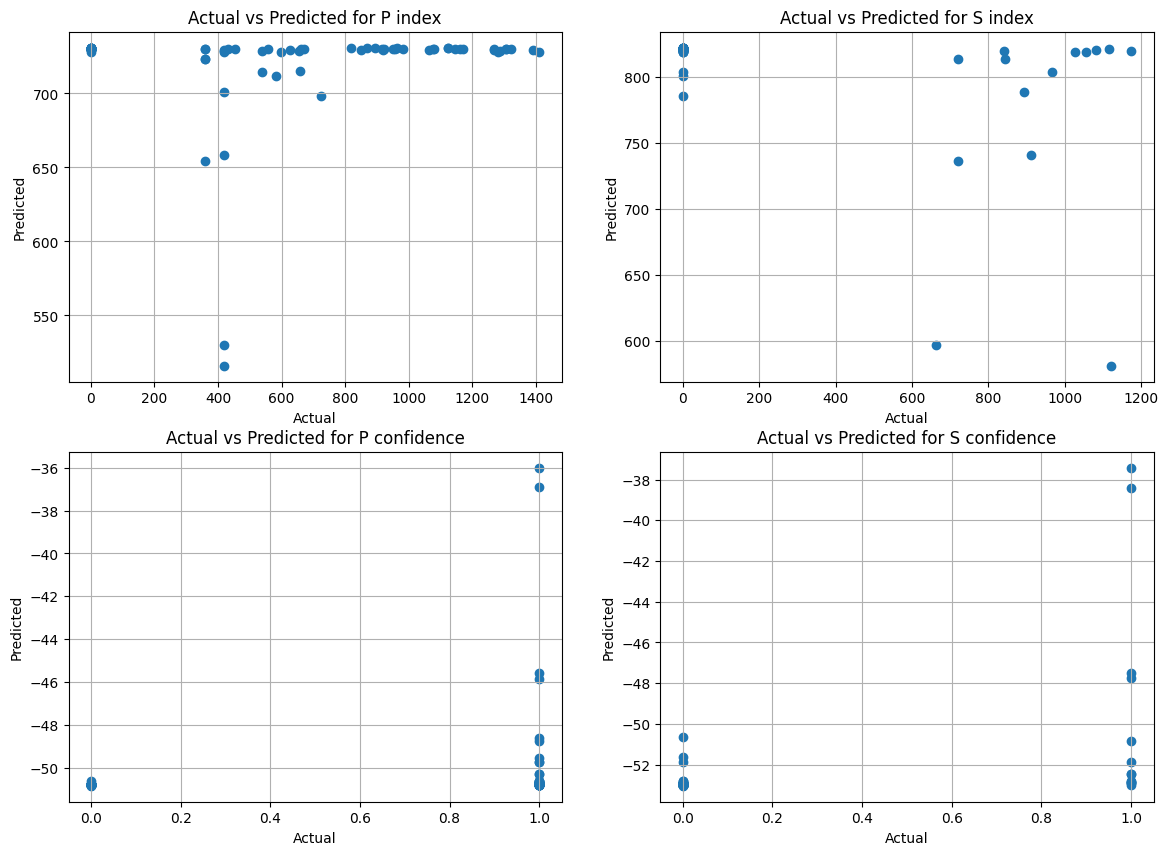

Actual p index: tensor([   0.,    0.,  659., 1286.,  849.,  915.,    0.,    0.,  583.,  359.])
Predicted p index: tensor([730.4783, 730.0939, 714.9607, 728.8495, 729.6689, 730.0610, 730.2859,
        730.1265, 711.9743, 730.2151])
Ground truth condition p index: tensor([False, False,  True,  True,  True,  True, False, False,  True,  True])
Prediction condition p index: tensor([1, 1, 1, 0, 0, 0, 1, 1, 0, 0], dtype=torch.int32)
--------------------------------
Actual s index: tensor([  0.,   0., 967.,   0.,   0.,   0.,   0.,   0.,   0.,   0.])
Predicted s index: tensor([821.8818, 821.4484, 804.2681, 820.0256, 820.9698, 821.4265, 821.6661,
        821.4874, 801.0208, 821.5592])
Ground truth condition s index: tensor([False, False,  True, False, False, False, False, False, False, False])
Prediction condition s index: tensor([1, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=torch.int32)
P Index Loss: 1156.7411 seconds
S Index Loss: 536.6479 seconds


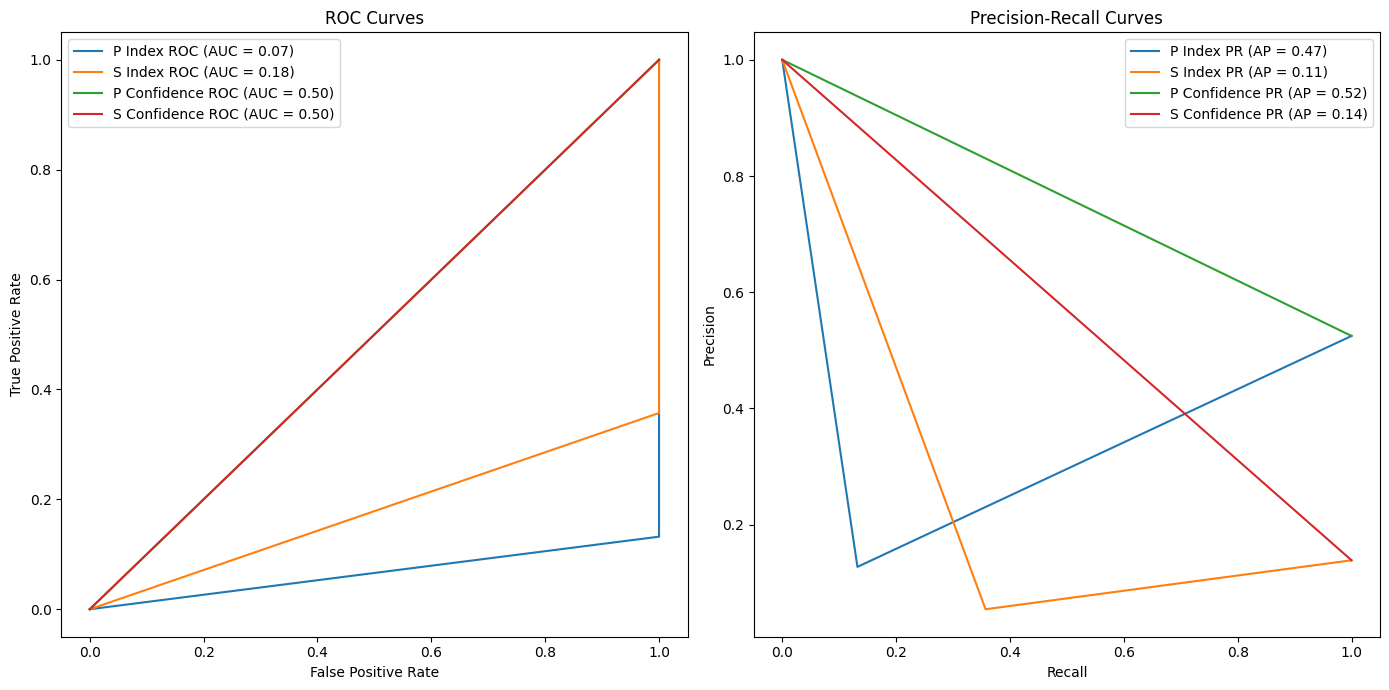

In [3]:
# Evaluate the model with the test dataloader
criterion = CustomLoss(lambda_val=1)
train_losses = []
val_losses = []
output_path  = 'output/'+model_name.split('.')[0]+'_test'
evaluate_model(model, test_dataloader, criterion, output_path)